STEP 0: Install Required Libraries

In [1]:
pip install numpy pandas scikit-learn matplotlib xgboost


STEP 1: Load the Dataset

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # 0 = malignant, 1 = benign

# Optional: view dataset structure
print(X.head())
print("Target classes:", data.target_names)


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

STEP 2: Preprocess the Data

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


 STEP 3: Train Multiple Classification Models

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [11:11:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


STEP 4: Evaluate the Models

In [5]:
from sklearn.metrics import accuracy_score, classification_report

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔍 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=data.target_names))



🔍 Logistic Regression Accuracy: 0.9737
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


🔍 Support Vector Machine Accuracy: 0.9825
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        43
      benign       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


🔍 Random Forest Accuracy: 0.9649
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro av

STEP 5: Visualize Model Accuracy

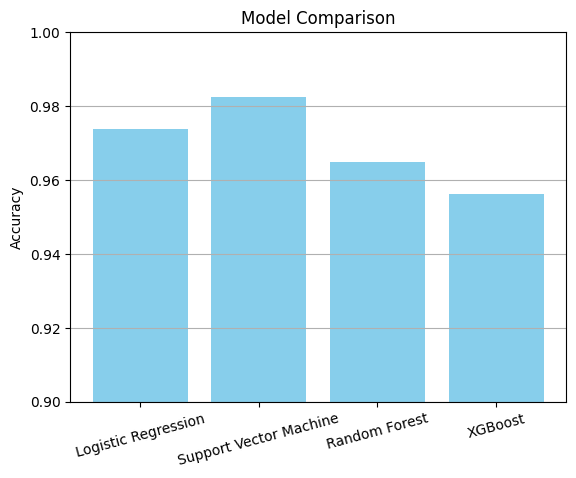

In [6]:
import matplotlib.pyplot as plt

accuracies = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in models.items()}

# Plot
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=15)
plt.ylim(0.9, 1.0)
plt.grid(axis='y')
plt.show()


Example: Adding Hyperparameter Tuning

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Best Score: 0.9604395604395604


In [8]:
import joblib

# Save model
joblib.dump(models["Random Forest"], "rf_model.pkl")

# Load later
model_loaded = joblib.load("rf_model.pkl")


STEP 6: Feature Analysis

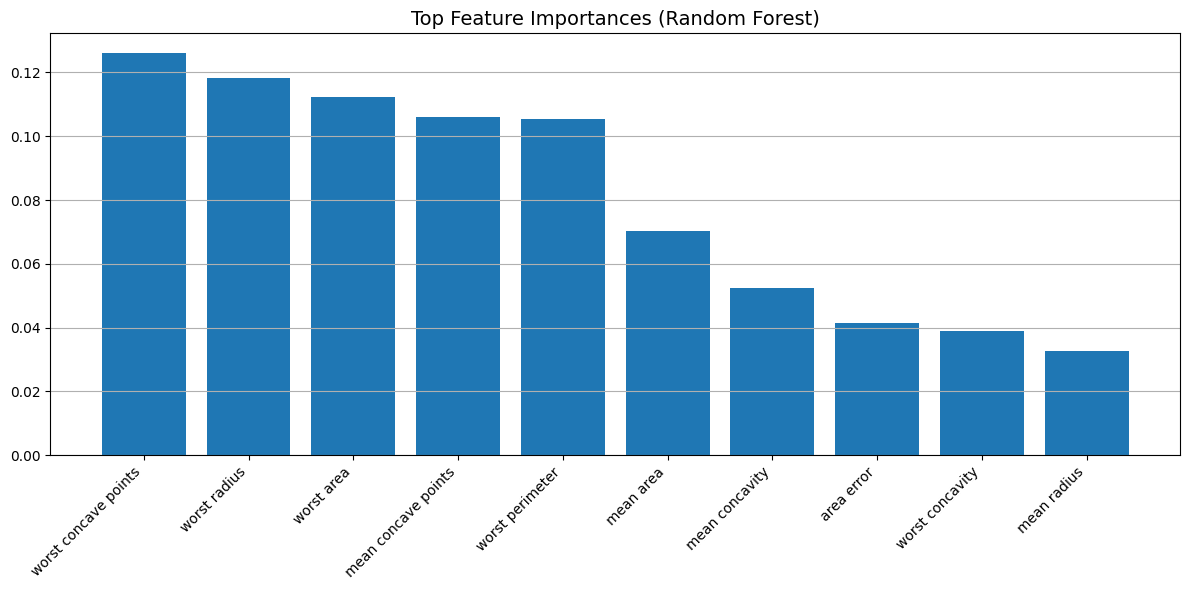

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature names
feature_names = X.columns

# Get trained Random Forest model
rf_model = models["Random Forest"]

# Get feature importances
importances = rf_model.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot top features
plt.figure(figsize=(12, 6))
plt.title("Top Feature Importances (Random Forest)", fontsize=14)
plt.bar(range(10), importances[indices[:10]], align='center')
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


Deeper Analysis

In [10]:
pip install shap


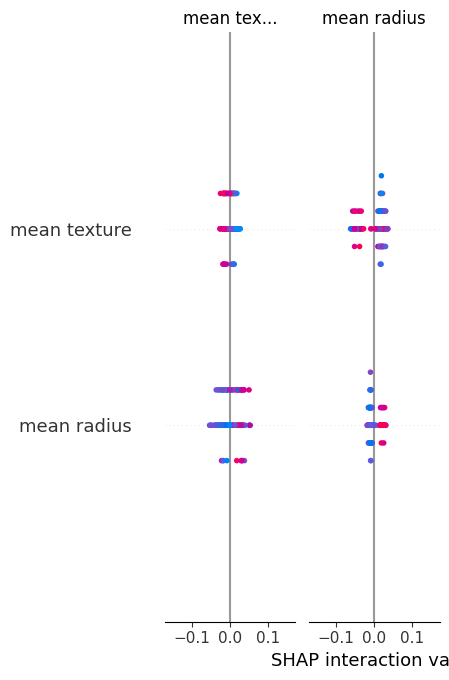

In [11]:
import shap
import numpy as np

# ✅ Use the Random Forest or XGBoost model
model = models["Random Forest"]  # or models["XGBoost"]

# ✅ Choose a small sample (SHAP can be slow on big data)
X_sample = X_test[:100]

# ✅ SHAP expects input as DataFrame
import pandas as pd
X_sample_df = pd.DataFrame(X_sample, columns=X.columns)

# ✅ Create SHAP Explainer
explainer = shap.Explainer(model, X_sample_df)
shap_values = explainer(X_sample_df)

# ✅ Summary plot (global feature importance)
shap.summary_plot(shap_values, X_sample_df, plot_type="bar")


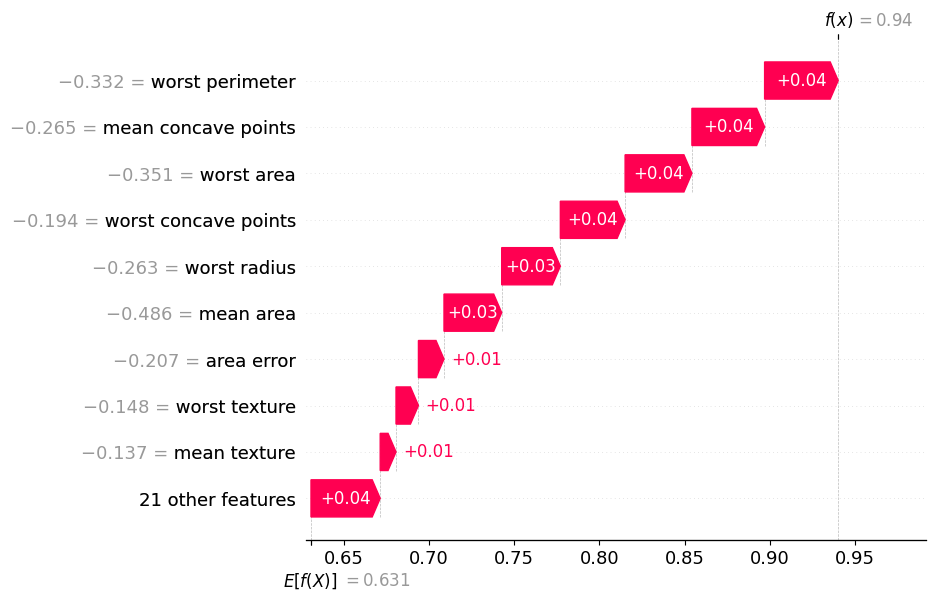

In [14]:
# Choose one prediction
index = 0  # Change to another index if you like
shap.plots.waterfall(shap_values[index, :, 1])

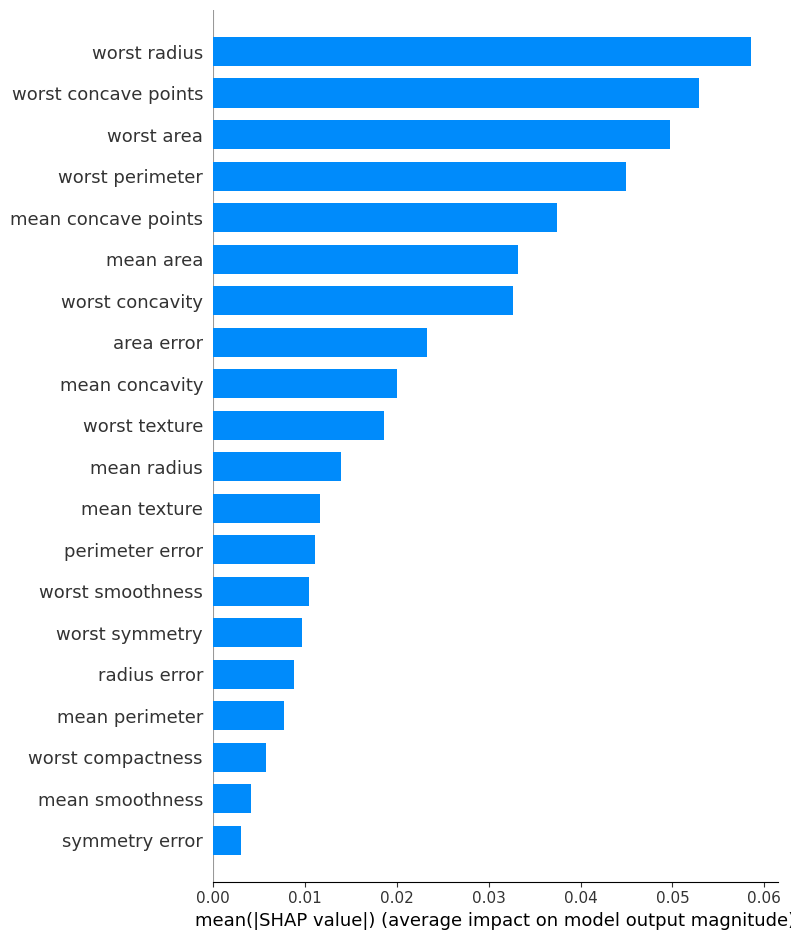

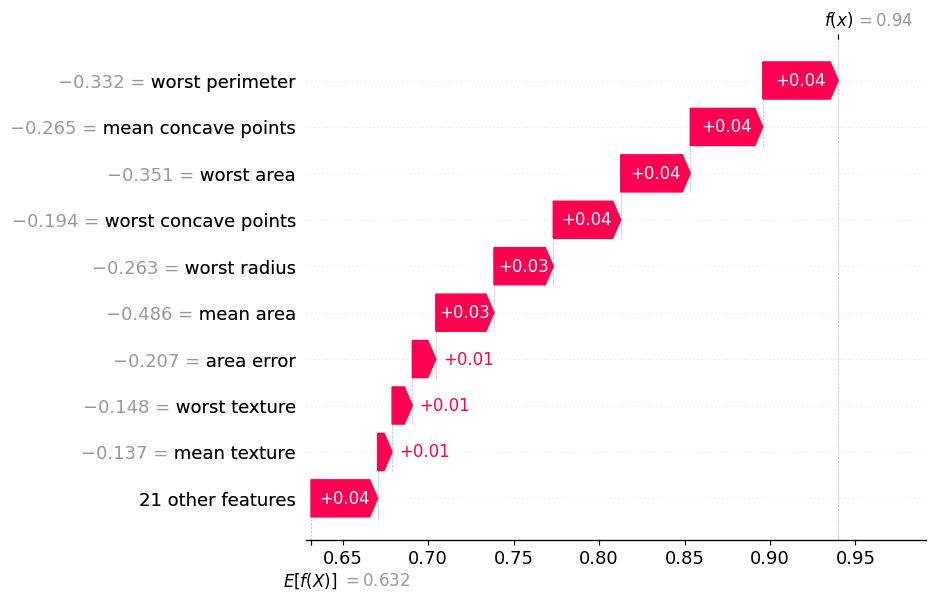

In [17]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(models["Random Forest"], pd.DataFrame(X_test, columns=X.columns))

# Compute SHAP values
shap_values = explainer(pd.DataFrame(X_test, columns=X.columns))

# Global explanation for the 'benign' class
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar")

# Local explanation for one prediction for the 'benign' class
shap.plots.waterfall(shap_values[0, :, 1])